### Problem Statement
##### Build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
## importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.metrics import roc_auc_score

In [2]:
## importing boston dataset
from sklearn.datasets import load_boston

In [3]:
## reading dataset to variable
boston=load_boston()

In [4]:
##Analyzing dataset
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [5]:
bos=pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
## Adding columns
bos.columns=boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [7]:
## Adding target as price to the dataset
print(boston.target.shape)
bos['PRICE']=boston.target
print(bos.head())

(506,)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [8]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### There are no missing values in the dataset

In [9]:
## There are no null fields
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
## Get the numeric variables by selecting only the variables that are not "object" data type

In [11]:
numeric_variables = list(bos.dtypes[bos.dtypes != "object"].index)
numeric_variables

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [12]:
## Get the non numeric variabled
non_numeric_variabes=list(bos.dtypes[bos.dtypes == "object"].index)
non_numeric_variabes

[]

##### There are no categorical varibales in the dataset

In [14]:
##Split train test dataset
X=bos.drop('PRICE',axis=1).values
y=bos['PRICE'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [16]:
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",y_train.shape)
print("Y_test.shape : ",y_test.shape)

X_train Shape :  (354, 13)
X_test Shape :  (152, 13)
Y_train Shape :  (354,)
Y_test.shape :  (152,)


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1,n_estimators=100,oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [18]:
## the oob_score_ gives the R^2 based on the oob prediction
rf.oob_score_

0.8649116378321358

In [19]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = rf.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(y_pred,y_test))
print("R2 Score of the Regression Model rf : ",r2_score(y_pred,y_test))

Error Rate of the Regression Model rf :  14.643137690789471
R2 Score of the Regression Model rf :  0.7577255767859197


#### Variable importance measure

In [20]:
rf.feature_importances_

array([0.03643239, 0.00128504, 0.00790404, 0.00276478, 0.01781784,
       0.47640611, 0.01062698, 0.03280664, 0.00373821, 0.01722385,
       0.02192314, 0.01178829, 0.35928269])

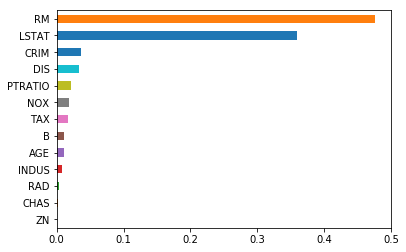

In [21]:
feature_importance=pd.Series(rf.feature_importances_,index=bos.columns[bos.columns!='PRICE'])
feature_importance=feature_importance.sort_values()
feature_importance.plot(kind="barh")

#### Parameter Test
- Parameters that will make your model better
    - n_estimator :- Number of tress in the forest
    - max_features :- The number of features to be considered when looking fir the best fit
    - min_samples_leaf :- minimum number of samples in newly created leaves
- Parameter that will make it easier to train your model
    - n_job :- determine if multiple processors should be used


- n_job

In [22]:
%%timeit
rf = RandomForestRegressor(random_state=1,n_estimators=1000,oob_score=True,n_jobs=1)
rf.fit(X_train, y_train)

2.52 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
rf = RandomForestRegressor(random_state=1,n_estimators=1000,oob_score=True,n_jobs=-1)
rf.fit(X_train, y_train)

1.84 s ± 80.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- There is slight performance gain when we use n_jobs as -1

- n_estimator

In [24]:
result=[]
n_estimator_options = [10,20,40,80,200,400,800,1000,1200,1500]
for trees in n_estimator_options:
    rf = RandomForestRegressor(random_state=1,n_estimators=trees,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    roc=r2_score(y_pred,y_test)
    result.append(roc)
    print("Tree ",trees)
    print("ROC ",roc)


Tree  10
ROC  0.7267769194195353
Tree  20
ROC  0.7507076501615648
Tree  40
ROC  0.757300659529798
Tree  80
ROC  0.7572465657160455
Tree  200
ROC  0.7658048341884651
Tree  400
ROC  0.7737451650716378
Tree  800
ROC  0.7657035188670059
Tree  1000
ROC  0.7633957935336795
Tree  1200
ROC  0.7621162342306134
Tree  1500
ROC  0.7620146763550981


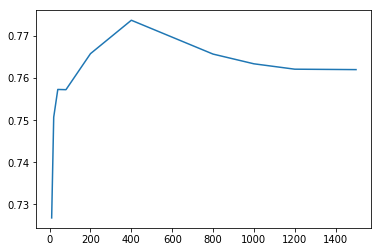

In [25]:
pd.Series(result, n_estimator_options).plot()

- Max ROC is achived at 400 trees

#### max features

Max Feature  auto
ROC  0.7737451650716378
Max Feature  None
ROC  0.7737451650716378
Max Feature  sqrt
ROC  0.6220765998941482
Max Feature  log2
ROC  0.622076599894148
Max Feature  0.9
ROC  0.7439856754081844
Max Feature  0.2
ROC  0.5786000316681197


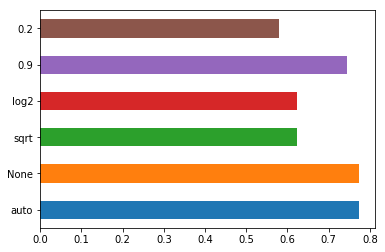

In [26]:
result=[]
max_features_options = ["auto",None,"sqrt","log2",.9,.2]
for features in max_features_options:
    rf = RandomForestRegressor(random_state=1,n_estimators=400,oob_score=True,n_jobs=-1,max_features=features)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    roc=r2_score(y_pred,y_test)
    result.append(roc)
    print("Max Feature ",features)
    print("ROC ",roc)
    
pd.Series(result, max_features_options).plot(kind="barh")

- Max ROC is achieved at max_features auto

##### min leaf samples

leaf  1
ROC  0.7737451650716378
leaf  2
ROC  0.729786263497264
leaf  3
ROC  0.6975139342102181
leaf  4
ROC  0.6911963925719862
leaf  5
ROC  0.6844734855718757
leaf  6
ROC  0.6790632642087301
leaf  7
ROC  0.67571997602656
leaf  8
ROC  0.6725230681241994
leaf  9
ROC  0.667837980613752
leaf  10
ROC  0.659161578662153


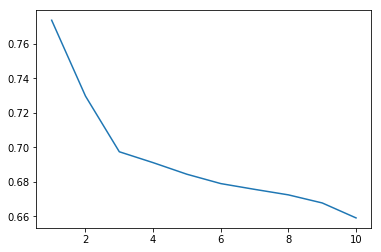

In [27]:
result=[]
min_leaf_options = [1,2,3,4,5,6,7,8,9,10]
for leaf in min_leaf_options:
    rf = RandomForestRegressor(random_state=1,n_estimators=400,oob_score=True,n_jobs=-1,max_features="auto",min_samples_leaf=leaf)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    roc=r2_score(y_pred,y_test)
    result.append(roc)
    print("leaf ",leaf)
    print("ROC ",roc)
    
pd.Series(result, min_leaf_options).plot()

#### Final Model

In [28]:
rf = RandomForestRegressor(random_state=1,n_estimators=400,oob_score=True,n_jobs=-1,max_features="auto",min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
roc=r2_score(y_pred,y_test)
print("ROC ",roc)

ROC  0.7737451650716378


#### K Fold Cross Validation

In [32]:
from sklearn.cross_validation import KFold
from collections import defaultdict
kfold = KFold(len(X),n_folds=8,shuffle=True,random_state=0)
lr = RandomForestRegressor(random_state=1,n_estimators=400,oob_score=True,n_jobs=-1,max_features="auto",min_samples_leaf=1)
#X=bos.drop('PRICE',axis=1).values
#y=bos['PRICE'].values
names = bos.drop('PRICE',axis=1).columns
fold_accuracy = []
scores_kfold =  defaultdict(list)
for train_fold, valid_fold in kfold:
    train = X[train_fold] # Extract train data with cv indices
    valid = X[valid_fold] # Extract valid data with cv indices
    
    train_y = y[train_fold]
    valid_y = y[valid_fold]
    
    model = lr.fit(train,train_y)
    pred = rf.predict(valid)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc) 
    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))


Accuracy per fold:  [0.7229620883289638, 0.8446127917474133, 0.9150857529133304, 0.8027970217536109, 0.9219287359346147, 0.6603363703171753, 0.9284057788125395, 0.8837186966471269] 

Average accuracy:  0.8349809045568468
